# Unevenly Spaced Data

In [1]:
using Multitaper, Plots, FINUFFT

┌ Info: Precompiling Multitaper [a81958ac-9ec9-4086-814d-3ae87249a5e8]
└ @ Base loading.jl:1278


The generalized prolate spheroidal sequences (Bronez, 1988) solve the generalized eigenvalue equation when the observing times are unevenly spaced. We follow the example in (Chave, 2019).

In [7]:
N = 500
t = (0.0:(N-1)).^(1.05)

W = 0.008
K = 5
f0 = 0.0

lam, u, R = gpss(W, K, t, f0);
lam, u = Multitaper.gpss_orth(W, K, t, f0);

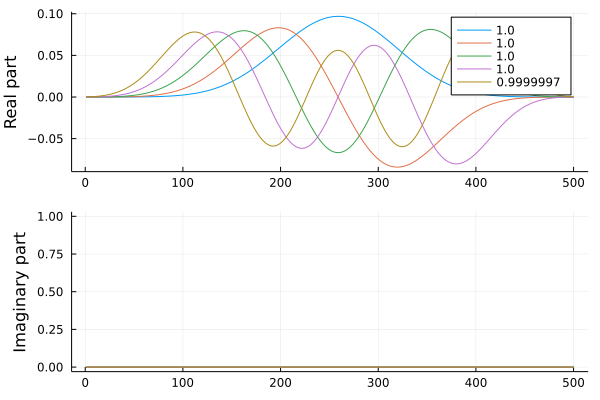

In [8]:
p1 = plot(real.(u), ylabel="Real part", label = round.(lam, digits= 7)') 
p2 = plot(imag.(u), ylabel="Imaginary part", legend = false) 

plot(p1, p2, layout = (2,1))

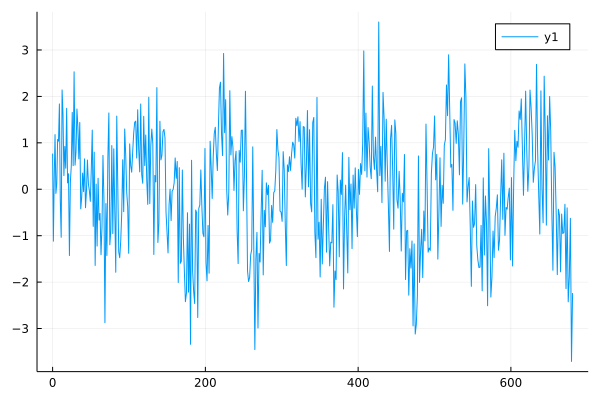

In [9]:
x = sin.(2*pi*0.01*t) + randn(N)
plot(t,x)

In [10]:
freq = collect(LinRange(-pi, pi, length(t)))
Pxx = abs2.(nufft1d3(t,ComplexF64.(x),-1,1e-15,freq))/N;

In [11]:
@time Sb = bspec(t, x, W, K, 0.5, 0.0, false)

 14.162639 seconds (200.09 k allocations: 12.235 GiB, 13.14% gc time)


MTSpectrum{EigenCoefficient,Array{Float64,1},Nothing}([0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024, 0.028, 0.032, 0.036  …  0.96, 0.964, 0.968, 0.9720000000000001, 0.976, 0.98, 0.984, 0.988, 0.9919999999999999, 0.996], [0.10806746209747779, 0.19809698871091114, 0.778278422711854, 5.3054604550524616, 6.00759532765472, 6.045252936489045, 5.883725281363539, 5.292318804987464, 1.369628407961406, 0.4459448100232387  …  0.26545352862095045, 0.27662816021190906, 0.23465042415960902, 0.19793367099427703, 0.22879446571645784, 0.208957108648738, 0.223507851675536, 0.3405452339278288, 0.28694765940204864, 0.35365276017645353], nothing, MTParameters(4.0, 5, 500, 1.0, 500, 1, nothing), EigenCoefficient(Complex{Float64}[-0.29848689970522946 - 2.971754216337589e-17im -0.29891967208875947 - 1.334041747224695e-16im … 0.06698490028369958 - 2.2079604970675726e-16im -0.2061666922066504 - 1.260840751929705e-16im; 0.19299274886514153 - 0.010707898754012415im 0.39284824999733153 + 0.07576049622436089im … 0.

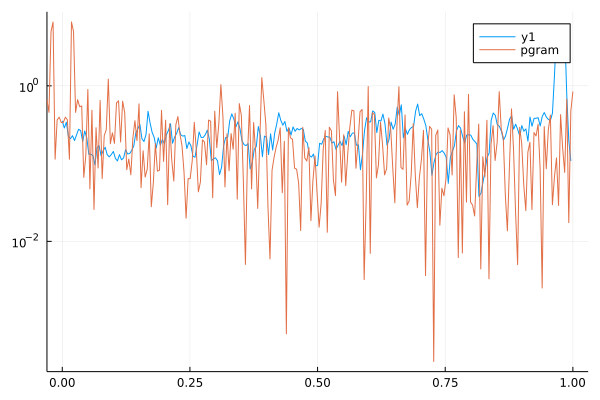

In [12]:
plot(Sb.f, Sb.S[end:-1:1], xlims = [0.0, 1.0])
plot!(freq/pi, Pxx/4, yscale = :log10, label = "pgram")

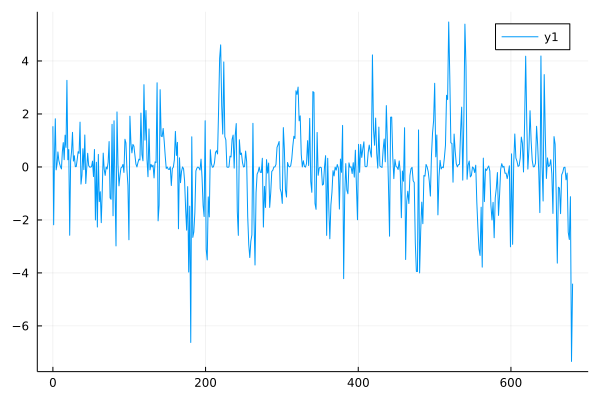

In [13]:
y = x .* (1 .+ cos.(2*pi*0.05*t))
plot(t,y)

In [14]:
@time Sxy = bspec(t, hcat(x,y), W, K, 0.5, 0.0)

 32.891715 seconds (251.93 k allocations: 24.461 GiB, 13.42% gc time)


(MTSpectrum{EigenCoefficient,Array{Float64,1},Nothing}[MTSpectrum{EigenCoefficient,Array{Float64,1},Nothing}([0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024, 0.028, 0.032, 0.036  …  0.96, 0.964, 0.968, 0.9720000000000001, 0.976, 0.98, 0.984, 0.988, 0.9919999999999999, 0.996], [0.10806746209747779, 0.19809698871091114, 0.778278422711854, 5.3054604550524616, 6.00759532765472, 6.045252936489045, 5.883725281363539, 5.292318804987464, 1.369628407961406, 0.4459448100232387  …  0.26545352862095045, 0.27662816021190906, 0.23465042415960902, 0.19793367099427703, 0.22879446571645784, 0.208957108648738, 0.223507851675536, 0.3405452339278288, 0.28694765940204864, 0.35365276017645353], nothing, MTParameters(4.0, 5, 500, 1.0, 500, 1, nothing), EigenCoefficient(Complex{Float64}[-0.29848689970522946 - 2.971754216337589e-17im -0.29891967208875947 - 1.334041747224695e-16im … 0.06698490028369958 - 2.2079604970675726e-16im -0.2061666922066504 - 1.260840751929705e-16im; 0.19299274886514153 - 0.01070789875401

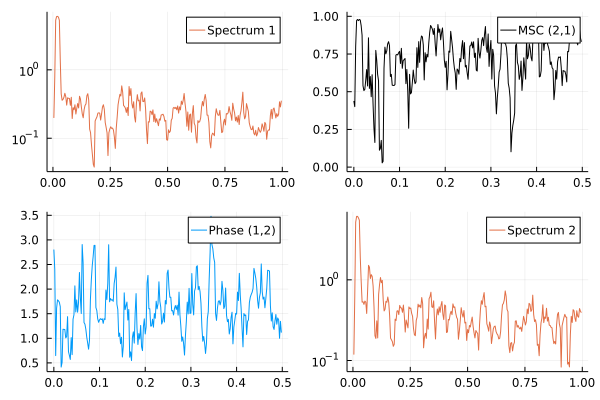

In [15]:
plot(Sxy)

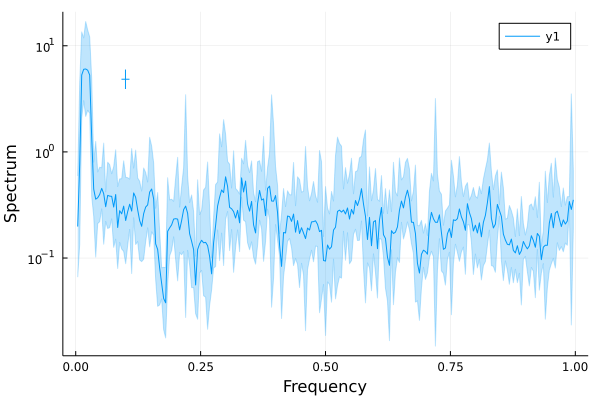

In [16]:
plot(Sxy[1][1])